# Decision Point Price Momentum Oscillator (PMO)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:dppmo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500


In [4]:
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)) * 100
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC
Date,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858


In [5]:
df['35_Custom_EMA_ROC'] = df['ROC'].ewm(ignore_na=False,span=35,min_periods=0,adjust=True).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC
Date,,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954


In [6]:
df['35_Custom_EMA_ROC_10'] = df['35_Custom_EMA_ROC']*10
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917,-1.119172
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169,2.071693
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171,5.271710
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848,6.328485
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954,5.139537


In [7]:
df = df.dropna()
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10
Date,,,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917,-1.119172
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169,2.071693
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171,5.271710
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848,6.328485
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954,5.139537
2017-01-11,118.739998,119.930000,118.599998,119.750000,115.615723,27588600,0.537319,0.518425,5.184247
2017-01-12,118.900002,119.300003,118.209999,119.250000,115.132988,27086200,-0.417534,0.360738,3.607379
2017-01-13,119.110001,119.620003,118.809998,119.040001,114.930237,26111900,-0.176102,0.279470,2.794700
2017-01-17,118.339996,120.239998,118.220001,120.000000,115.857086,34439800,0.806445,0.352269,3.522685


In [8]:
df['PMO_Line'] = df['35_Custom_EMA_ROC_10'].ewm(ignore_na=False,span=20,min_periods=0,adjust=True).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line
Date,,,,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917,-1.119172,-1.119172
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169,2.071693,0.556032
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171,5.271710,2.287601
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848,6.328485,3.454141
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954,5.139537,3.861824


In [9]:
df['PMO_Signal_Line'] = df['PMO_Line'].ewm(ignore_na=False,span=10,min_periods=0,adjust=True).mean()

In [10]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line,PMO_Signal_Line
Date,,,,,,,,,,,
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917,-1.119172,-1.119172,-1.119172
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169,2.071693,0.556032,-0.197810
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171,5.271710,2.287601,0.801309
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848,6.328485,3.454141,1.675299
2017-01-10,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954,5.139537,3.861824,2.302991


Text(0.5,0,'Date')

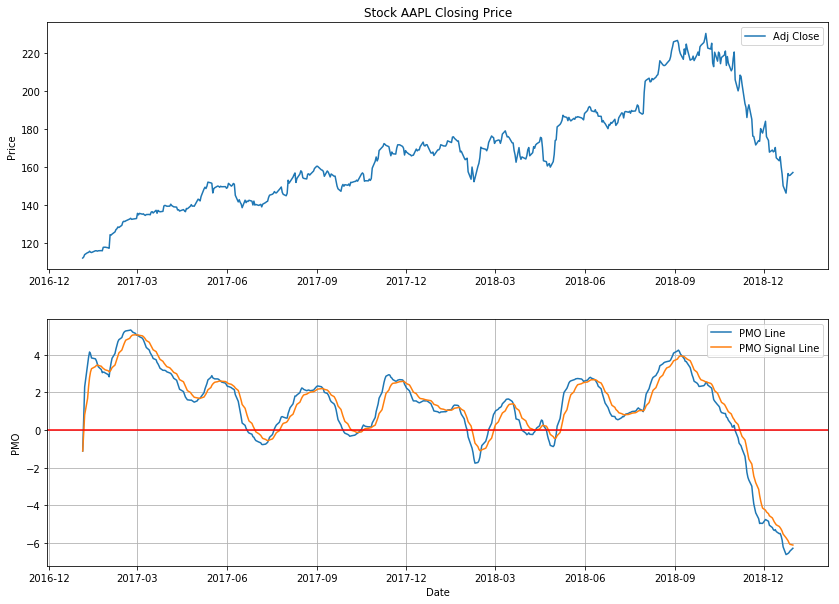

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PMO_Line'], label='PMO Line')
ax2.plot(df['PMO_Signal_Line'], label='PMO Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')

## Candlestick with PMO

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ROC,35_Custom_EMA_ROC,35_Custom_EMA_ROC_10,PMO_Line,PMO_Signal_Line,VolumePositive
0,736333.0,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,-0.111917,-1.119172,-1.119172,-1.119172,False
1,736334.0,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.508529,0.207169,2.071693,0.556032,-0.197810,False
2,736335.0,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,1.114829,0.527171,5.271710,2.287601,0.801309,False
3,736338.0,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.915942,0.632848,6.328485,3.454141,1.675299,False
4,736339.0,118.769997,119.379997,118.300003,119.110001,114.997818,24462100,0.100858,0.513954,5.139537,3.861824,2.302991,False


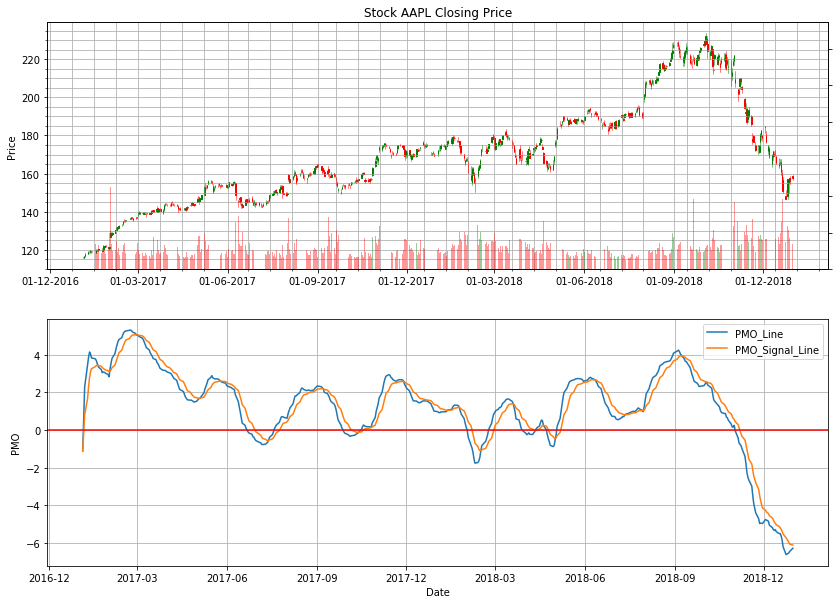

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PMO_Line'], label='PMO_Line')
ax2.plot(df['PMO_Signal_Line'], label='PMO_Signal_Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')
ax2.legend(loc='best')